## Complete EDA of Titanic Dataset

From Kaggle we have Titanic: Machine Learning from Disaster 

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Load Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
plt.rcParams['figure.figsize'] = [6,3]
plt.rcParams['figure.dpi'] = 80

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
cols = titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Heatmap

In [8]:
plt.style.use('ggplot')

In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

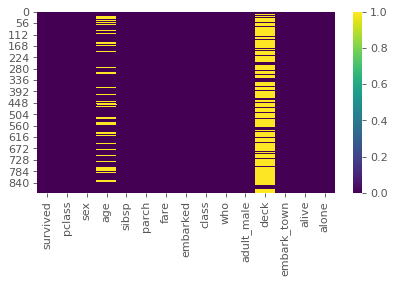

In [20]:
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=True)

In [14]:
corr = titanic.corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

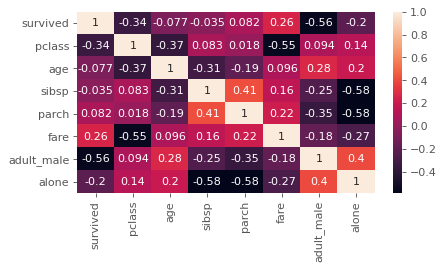

In [21]:
sns.heatmap(corr,annot=True)

## Univariate Analysis

In [24]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


C:\Users\Minango\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


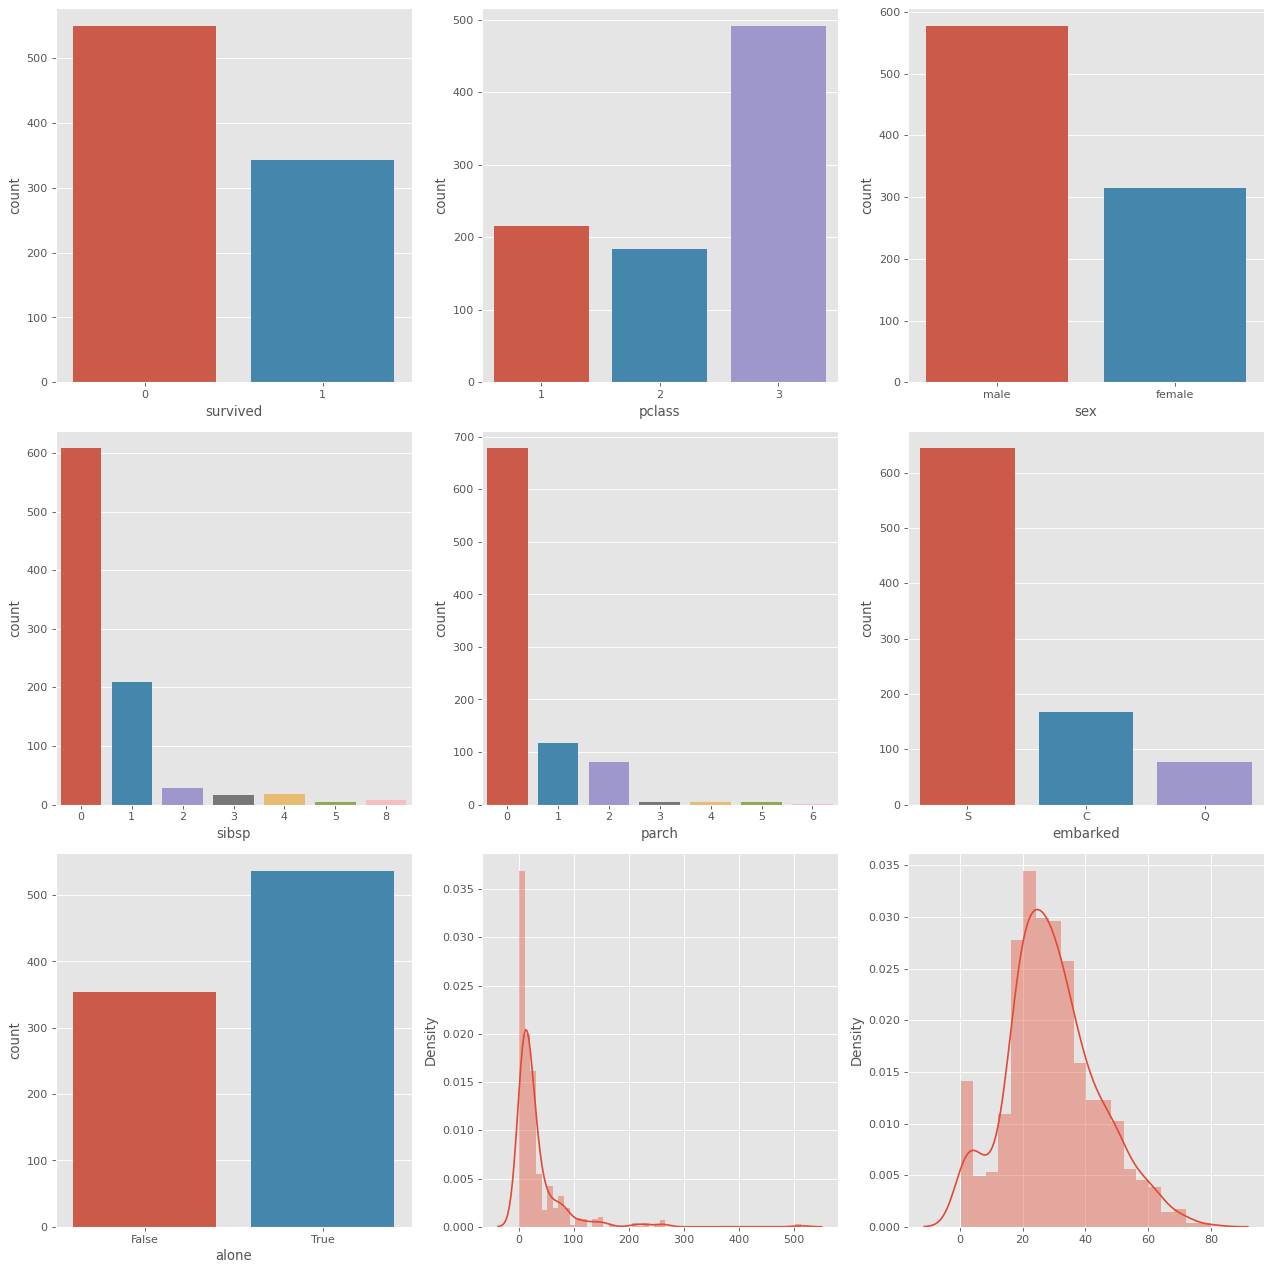

In [38]:
fig, ax = plt.subplots(3,3,figsize=(16,16))

sns.countplot(x='survived', data=titanic, ax=ax[0][0])
sns.countplot(x='pclass', data=titanic, ax=ax[0][1])
sns.countplot(x='sex', data=titanic, ax=ax[0][2])
sns.countplot(x='sibsp', data=titanic, ax=ax[1][0])
sns.countplot(x='parch', data=titanic, ax=ax[1][1])
sns.countplot(x='embarked', data=titanic, ax=ax[1][2])
sns.countplot(x='alone', data=titanic, ax=ax[2][0])

sns.distplot(x=titanic['fare'], kde=True, ax=ax[2][1])
sns.distplot(x=titanic['age'], kde=True, ax=ax[2][2])

plt.tight_layout()
plt.show()

### Survived 

In [40]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

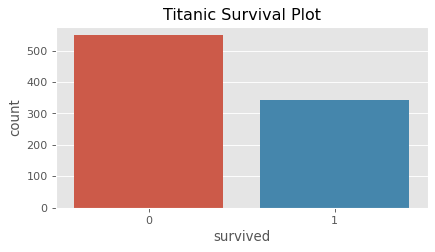

In [43]:
sns.countplot(x='survived',data=titanic)
plt.title('Titanic Survival Plot')
plt.show()

<AxesSubplot:>

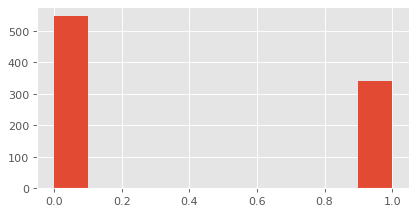

In [44]:
titanic['survived'].hist()

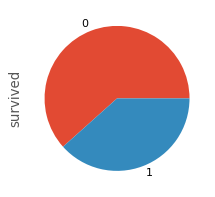

In [47]:
titanic['survived'].value_counts().plot.pie()
plt.show()

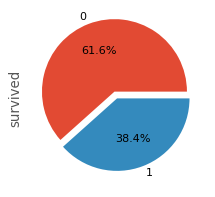

In [51]:
explode = [0.1, 0]
titanic['survived'].value_counts().plot.pie(autopct = '%1.1f%%',explode=explode)
plt.show()

### PClass

In [52]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [61]:
titanic.groupby(['pclass','survived'])['age'].count()

pclass  survived
1       0            64
        1           122
2       0            90
        1            83
3       0           270
        1            85
Name: age, dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='count'>

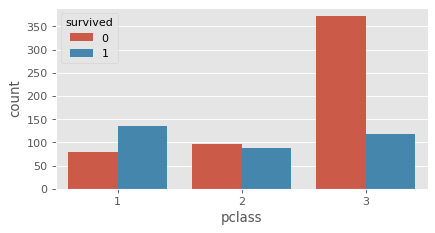

In [62]:
sns.countplot(x='pclass', data=titanic, hue='survived')

<AxesSubplot:ylabel='pclass'>

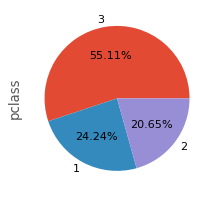

In [65]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.2f%%')

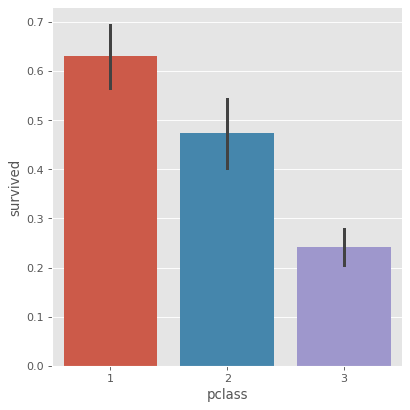

In [70]:
sns.catplot(x='pclass',y='survived',data=titanic, kind='bar')

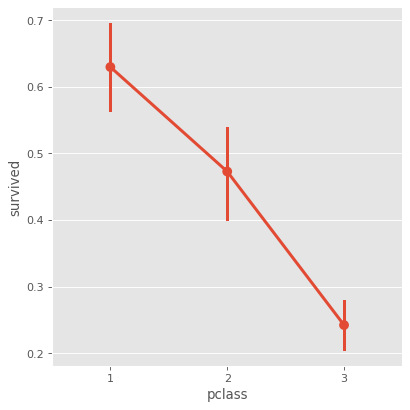

In [71]:
sns.catplot(x='pclass', y='survived', data=titanic, kind='point')

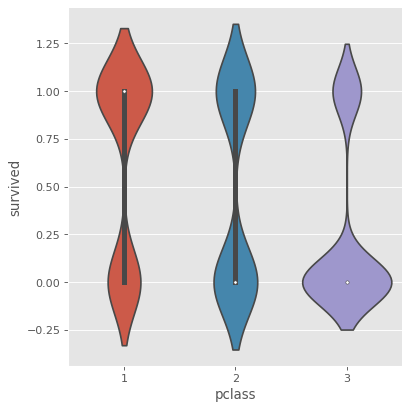

In [72]:
sns.catplot(x='pclass', y='survived', data=titanic, kind='violin')

### Sex

In [73]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [75]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

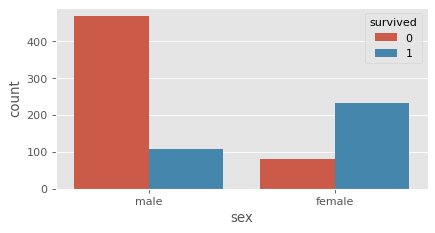

In [77]:
sns.countplot(x='sex',data=titanic,hue='survived')

<AxesSubplot:ylabel='sex'>

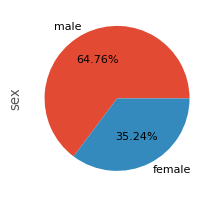

In [82]:
titanic['sex'].value_counts().plot.pie(autopct='%1.2f%%')

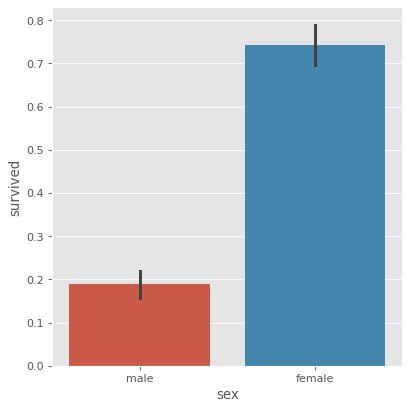

In [84]:
sns.catplot(x='sex', y='survived', data=titanic, kind='bar')

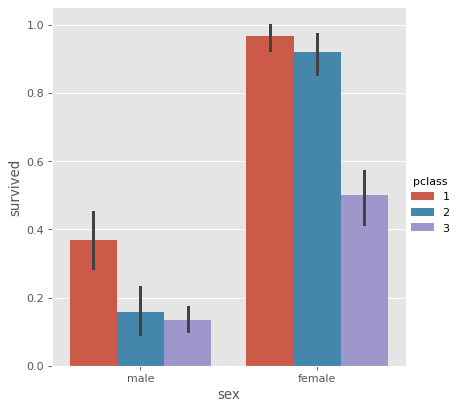

In [86]:
sns.catplot(x='sex',y='survived',data=titanic,hue='pclass',kind='bar')

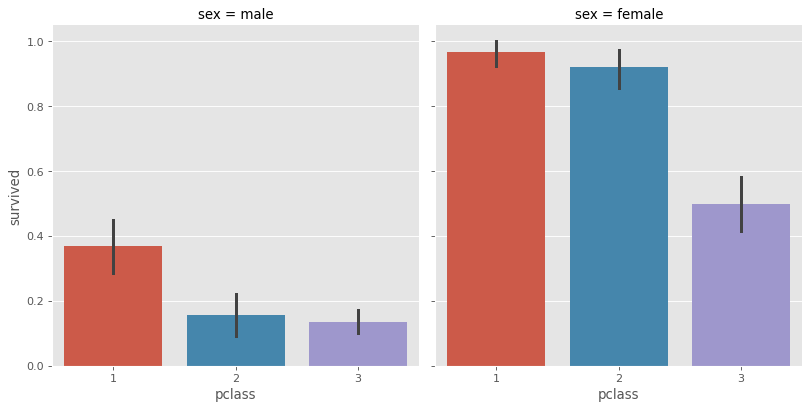

In [88]:
sns.catplot(x='pclass',y='survived',data=titanic,col='sex',kind='bar')

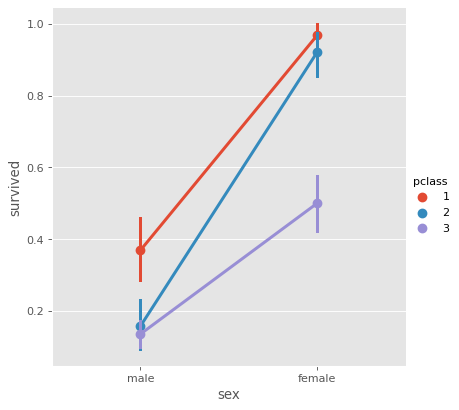

In [92]:
sns.catplot(x='sex',y='survived',data=titanic,kind='point',hue='pclass')

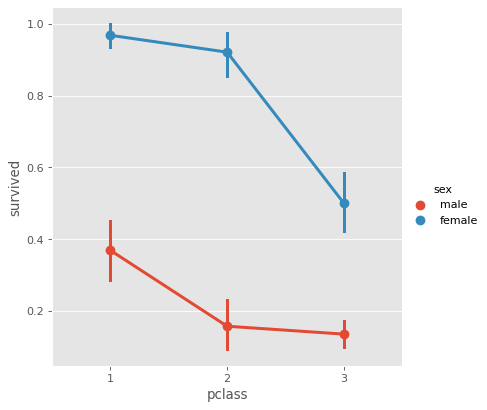

In [93]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='point',hue='sex')

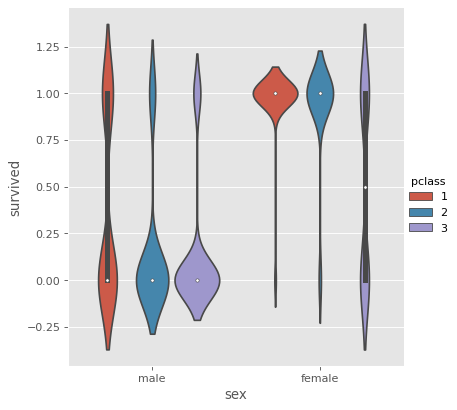

In [95]:
sns.catplot(x='sex',y='survived',data=titanic,kind='violin',hue='pclass')

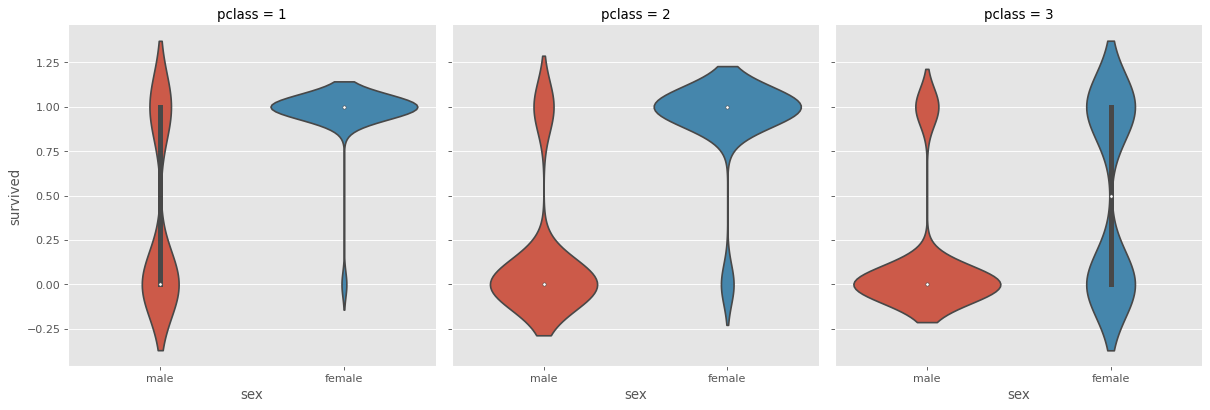

In [96]:
sns.catplot(x='sex',y='survived',data=titanic,kind='violin',col='pclass')

### Age

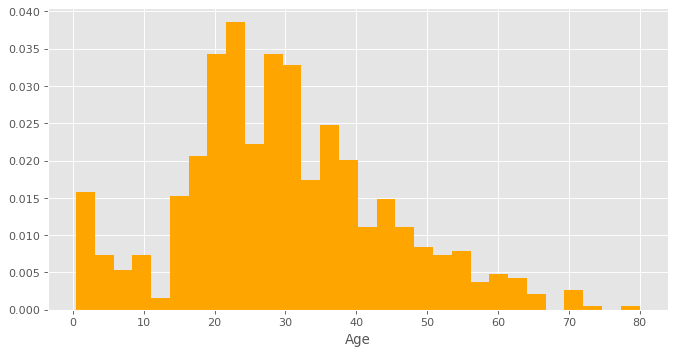

In [103]:
titanic['age'].hist(bins=30, figsize=(10,5), color='orange', density=True)
plt.xlabel('Age')
plt.show()

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

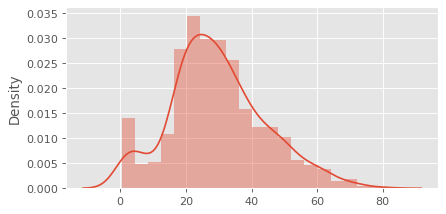

In [105]:
sns.distplot(x=titanic['age'])

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

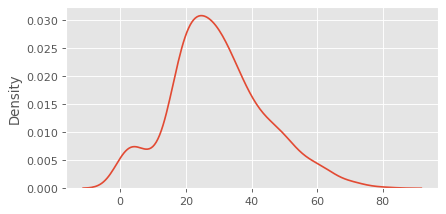

In [106]:
sns.distplot(x=titanic['age'], hist=False)

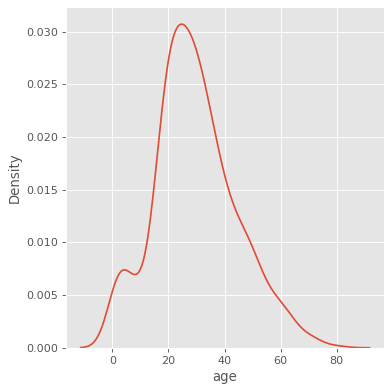

In [108]:
sns.displot(x=titanic['age'],kind='kde')

<AxesSubplot:xlabel='age', ylabel='Density'>

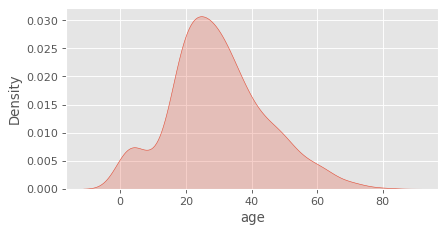

In [110]:
sns.kdeplot(titanic['age'],shade=True)

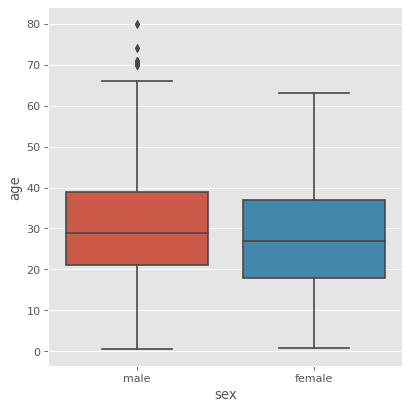

In [114]:
sns.catplot(x='sex',y='age',data=titanic,kind='box')

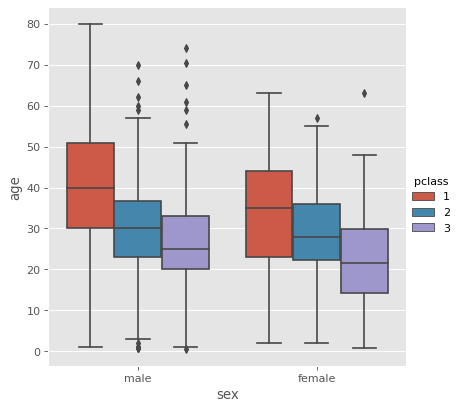

In [116]:
sns.catplot(x='sex',y='age',data=titanic,kind='box', hue='pclass')

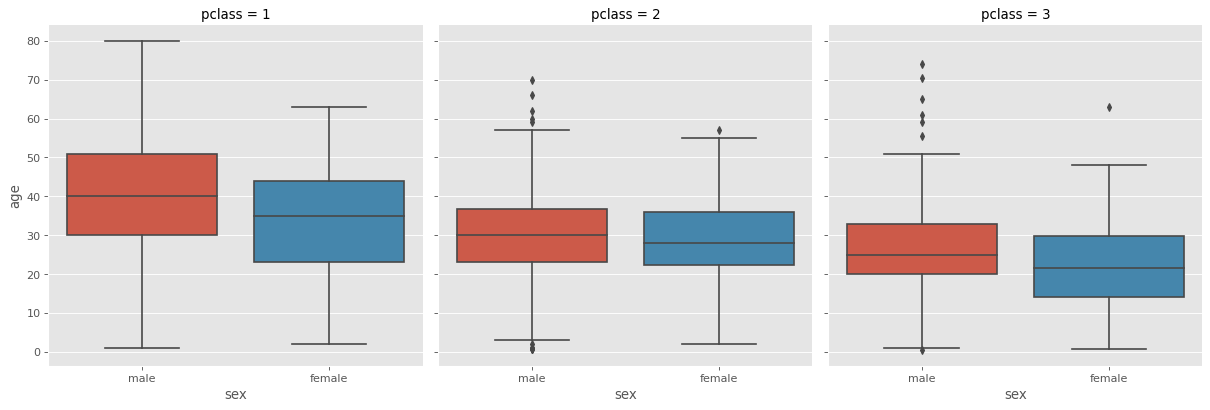

In [117]:
sns.catplot(x='sex',y='age',data=titanic,kind='box', col='pclass')

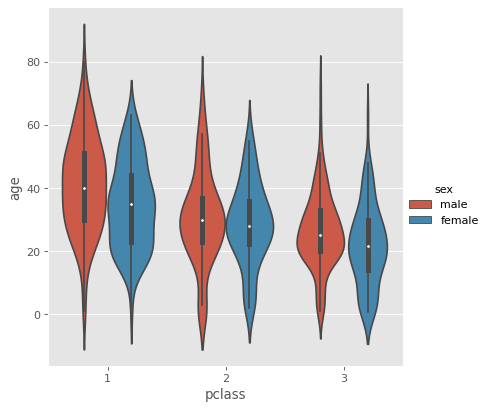

In [119]:
sns.catplot(x='pclass',y='age',data=titanic,kind='violin', hue='sex')

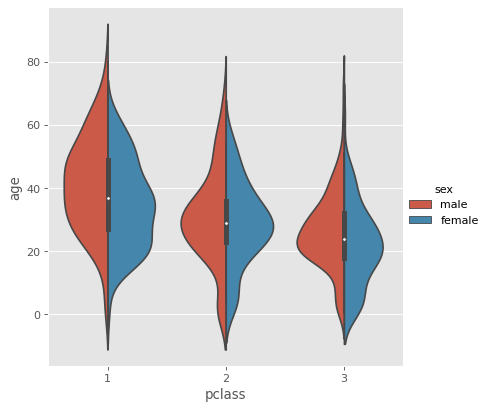

In [121]:
sns.catplot(x='pclass',y='age',data=titanic,kind='violin', hue='sex',split=True)

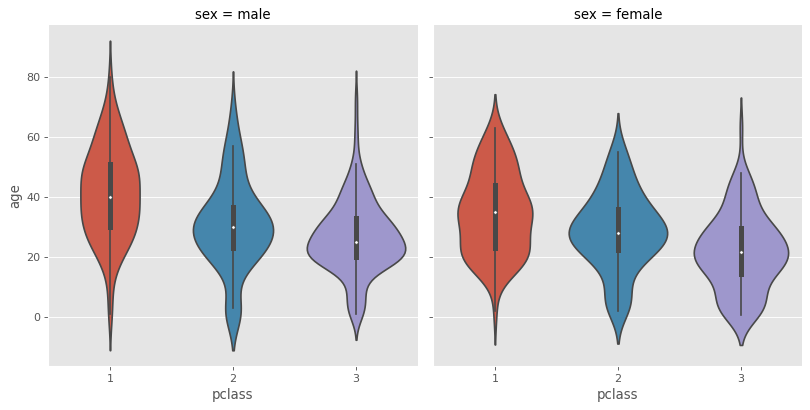

In [123]:
sns.catplot(x='pclass',y='age',data=titanic,kind='violin', col='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


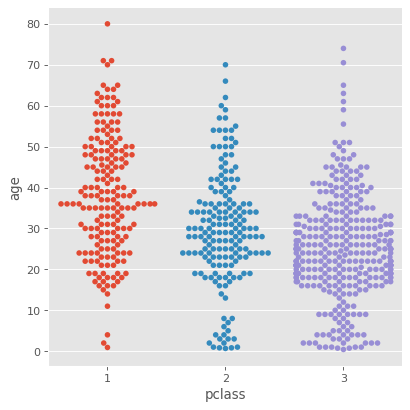

In [126]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


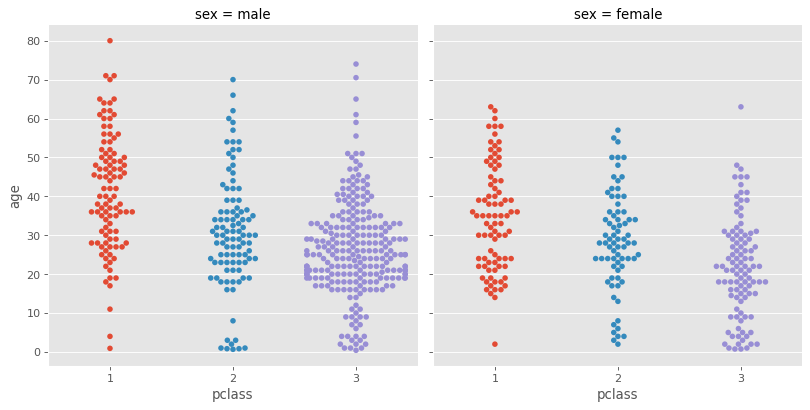

In [127]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm', col='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


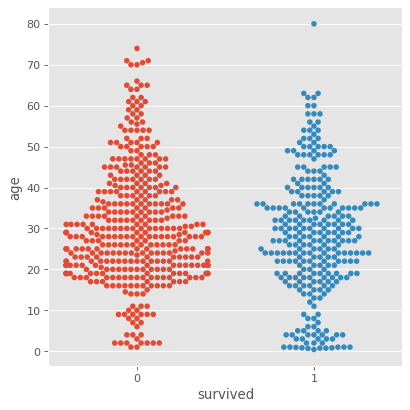

In [128]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm')

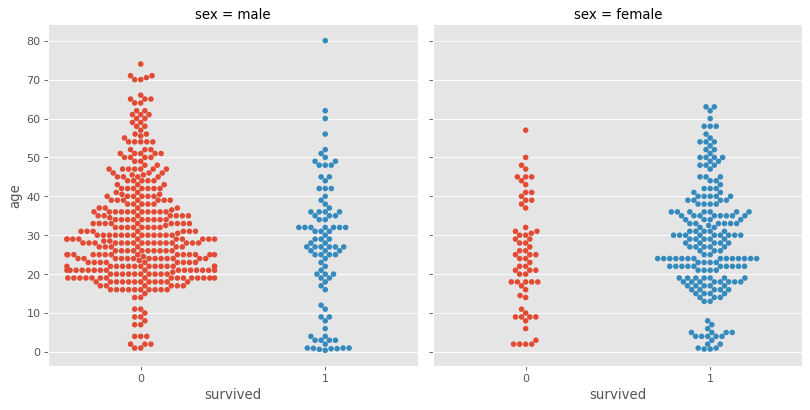

In [129]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', col='sex')

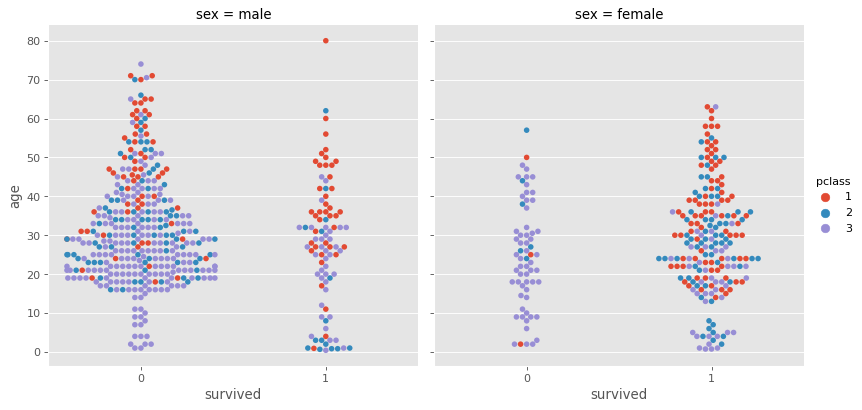

In [130]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', col='sex',hue='pclass')

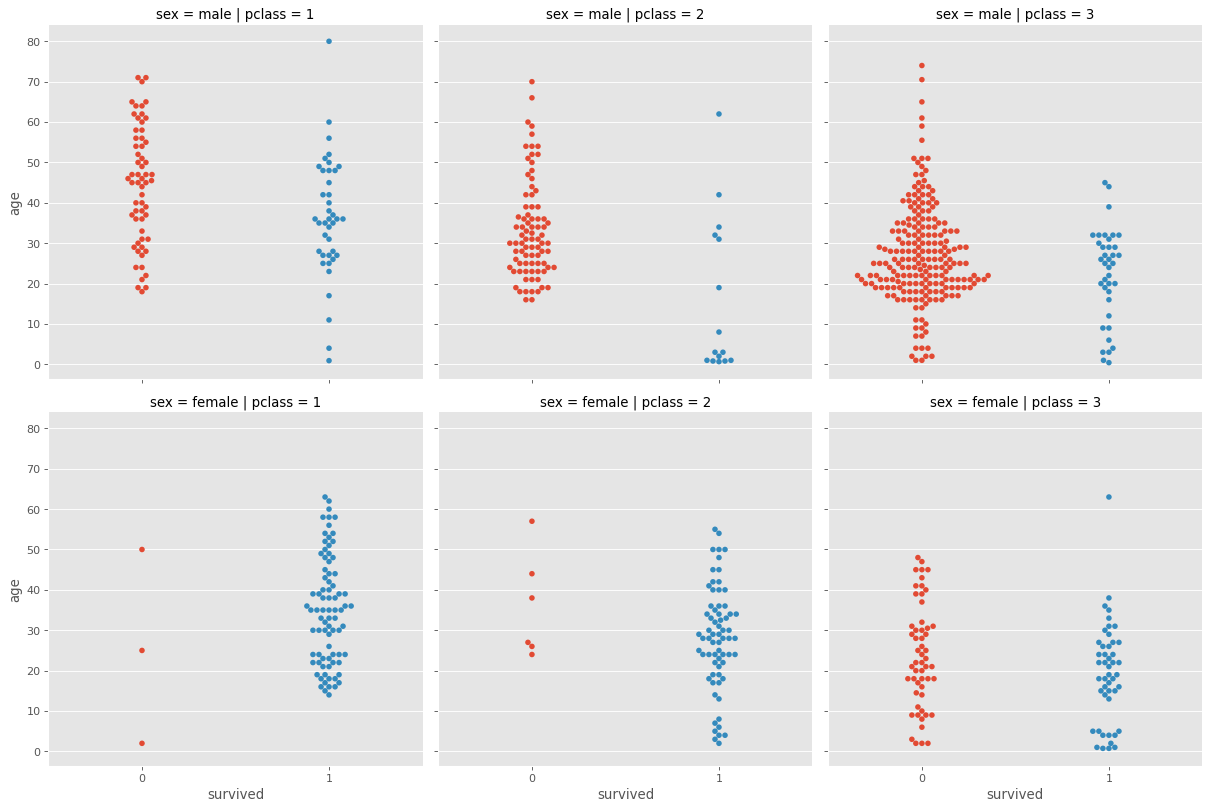

In [132]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', col='pclass', row='sex')

### Fare

<AxesSubplot:>

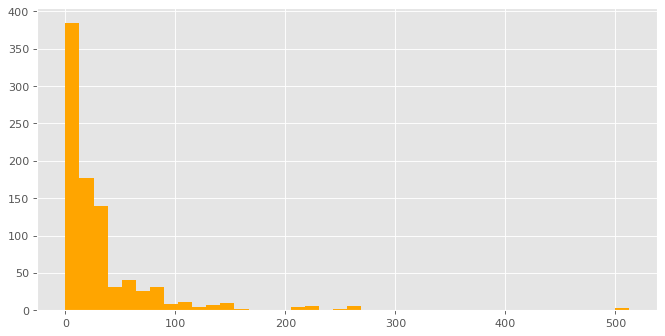

In [136]:
titanic['fare'].hist(bins=40, color='orange',figsize=(10,5))

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


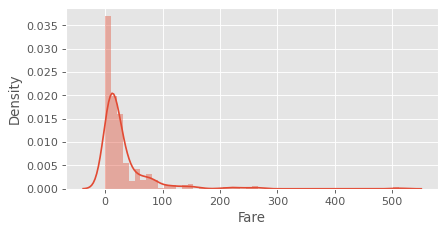

In [137]:
sns.distplot(titanic['fare'])
plt.xlabel('Fare')
plt.show()

<AxesSubplot:xlabel='fare', ylabel='Density'>

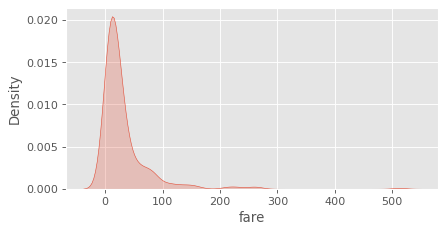

In [139]:
sns.kdeplot(titanic['fare'],shade=True)

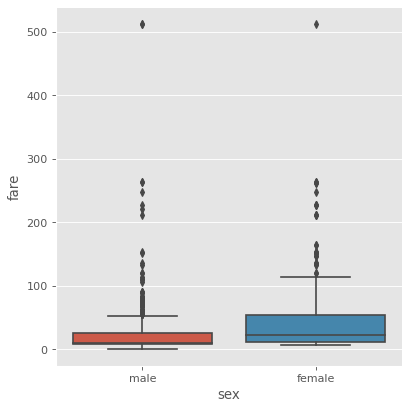

In [141]:
sns.catplot(x='sex',y='fare',data=titanic,kind='box')

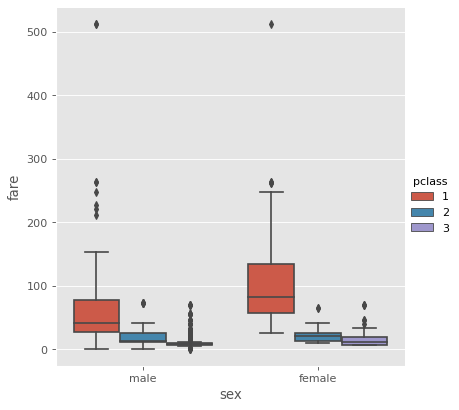

In [142]:
sns.catplot(x='sex',y='fare',data=titanic,kind='box',hue='pclass')

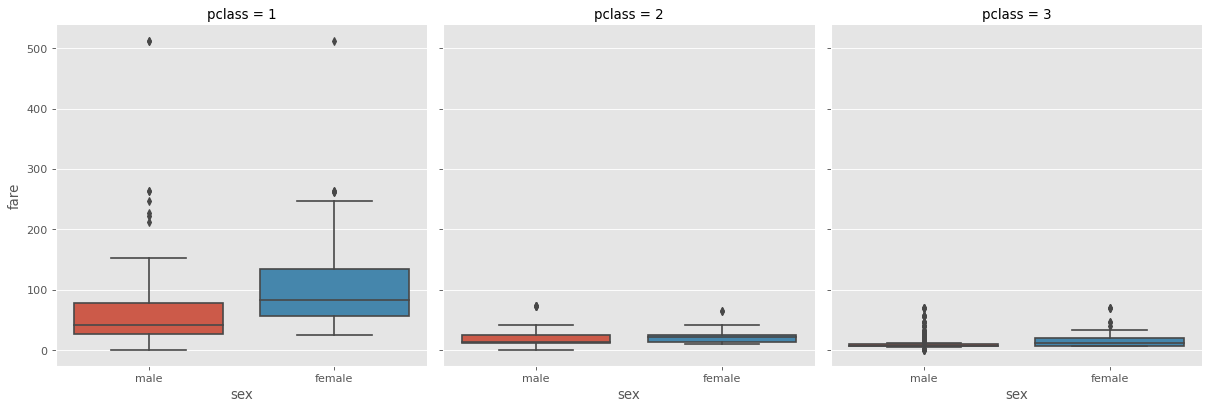

In [143]:
sns.catplot(x='sex',y='fare',data=titanic,kind='box',col='pclass')

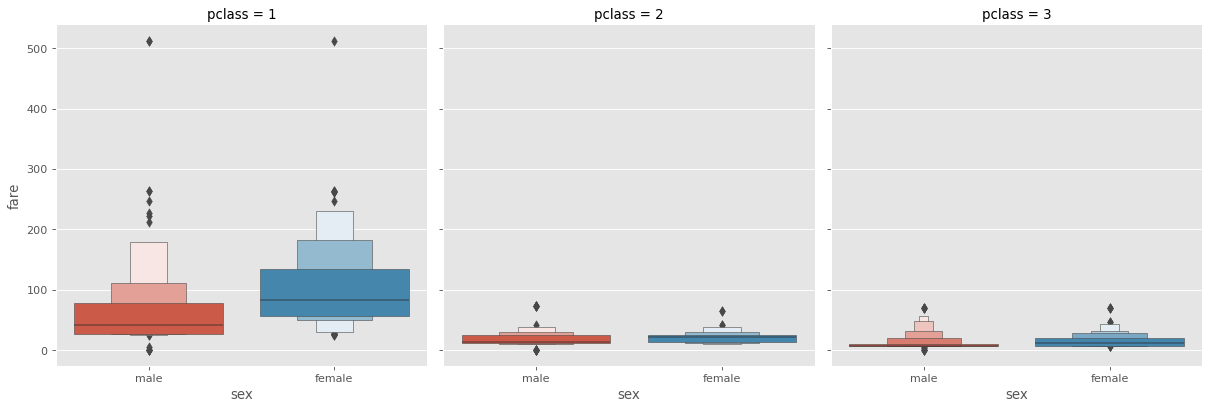

In [144]:
sns.catplot(x='sex',y='fare',data=titanic,kind='boxen',col='pclass')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


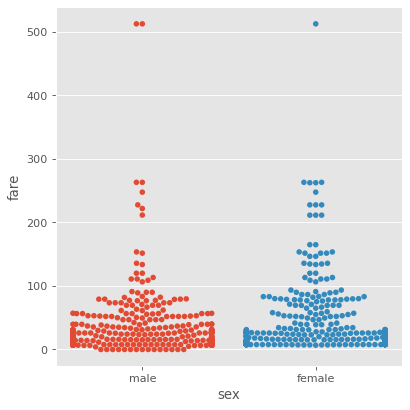

In [145]:
sns.catplot(x='sex',y='fare',data=titanic,kind='swarm')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of 

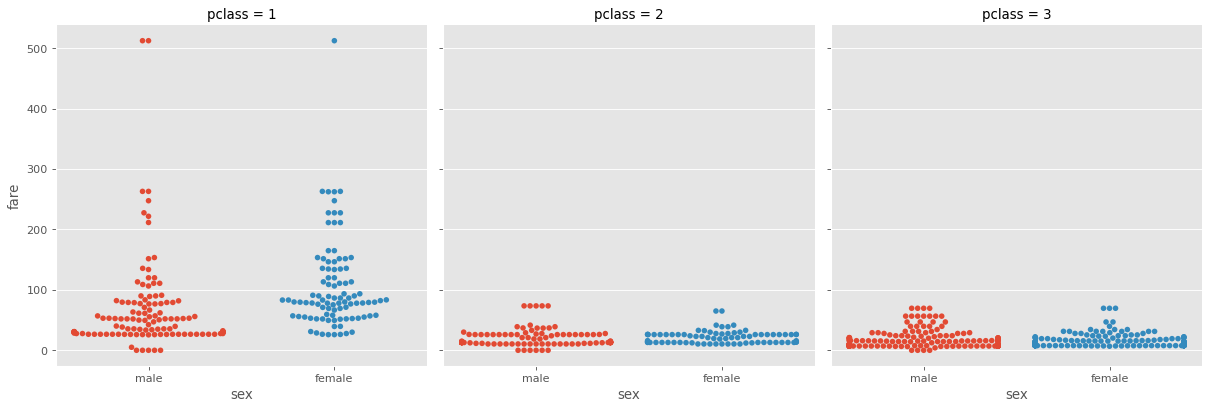

In [146]:
sns.catplot(x='sex',y='fare',data=titanic,kind='swarm',col='pclass')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


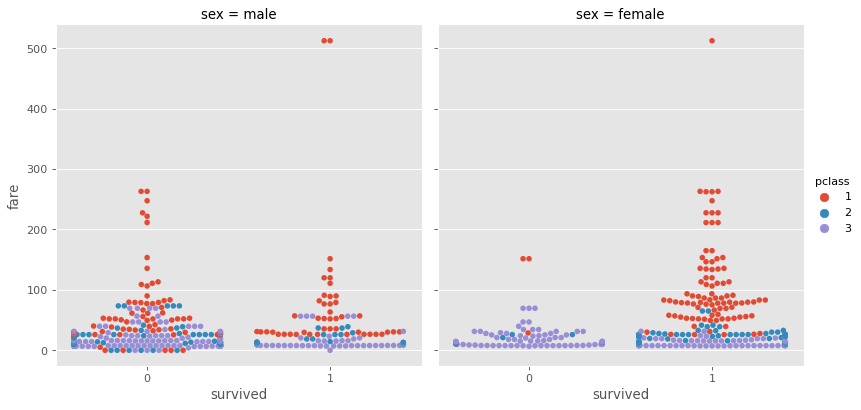

In [150]:
sns.catplot(x='survived',y='fare',data=titanic,kind='swarm',col='sex',hue='pclass')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of t

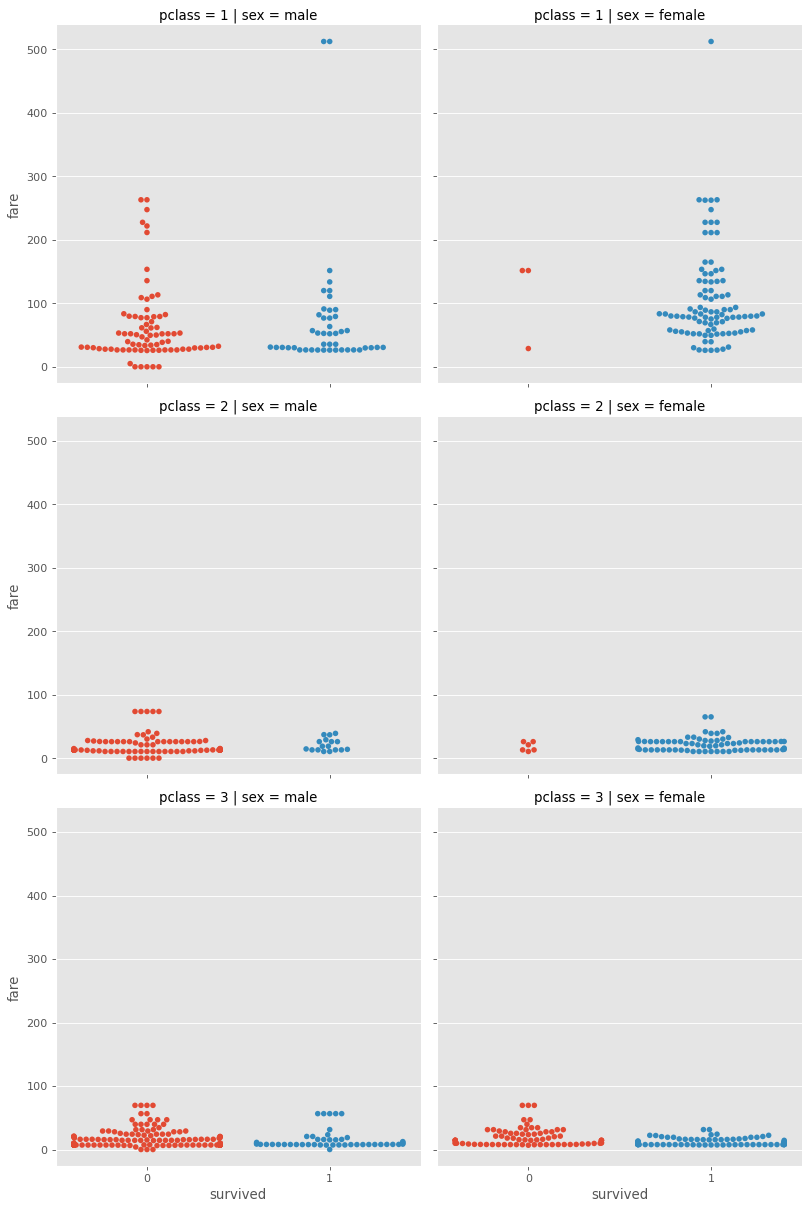

In [151]:
sns.catplot(x='survived',y='fare',data=titanic,kind='swarm',col='sex',row='pclass')

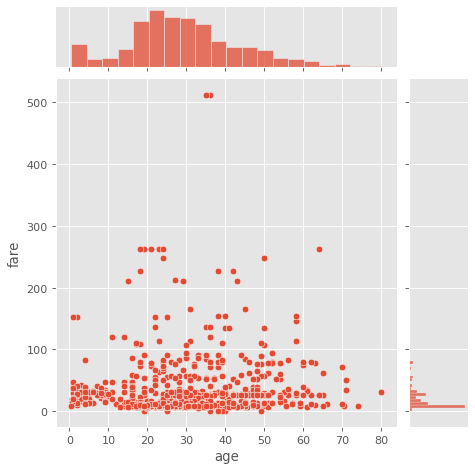

In [152]:
##JoinPlot
sns.jointplot(x='age',y='fare',data=titanic)

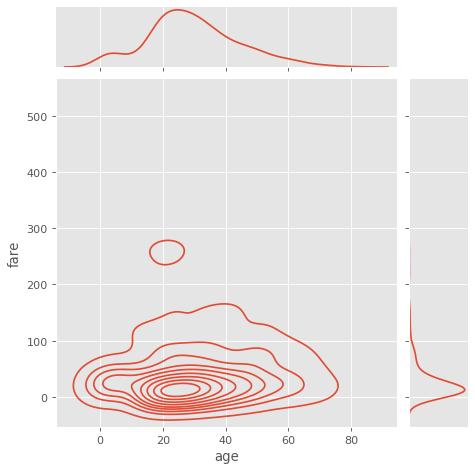

In [153]:
sns.jointplot(x='age',y='fare',data=titanic,kind='kde')

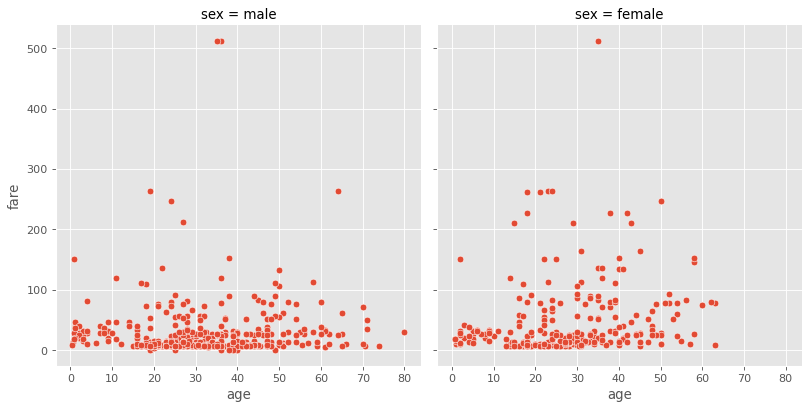

In [156]:
sns.relplot(x='age',y='fare',data=titanic,col='sex')

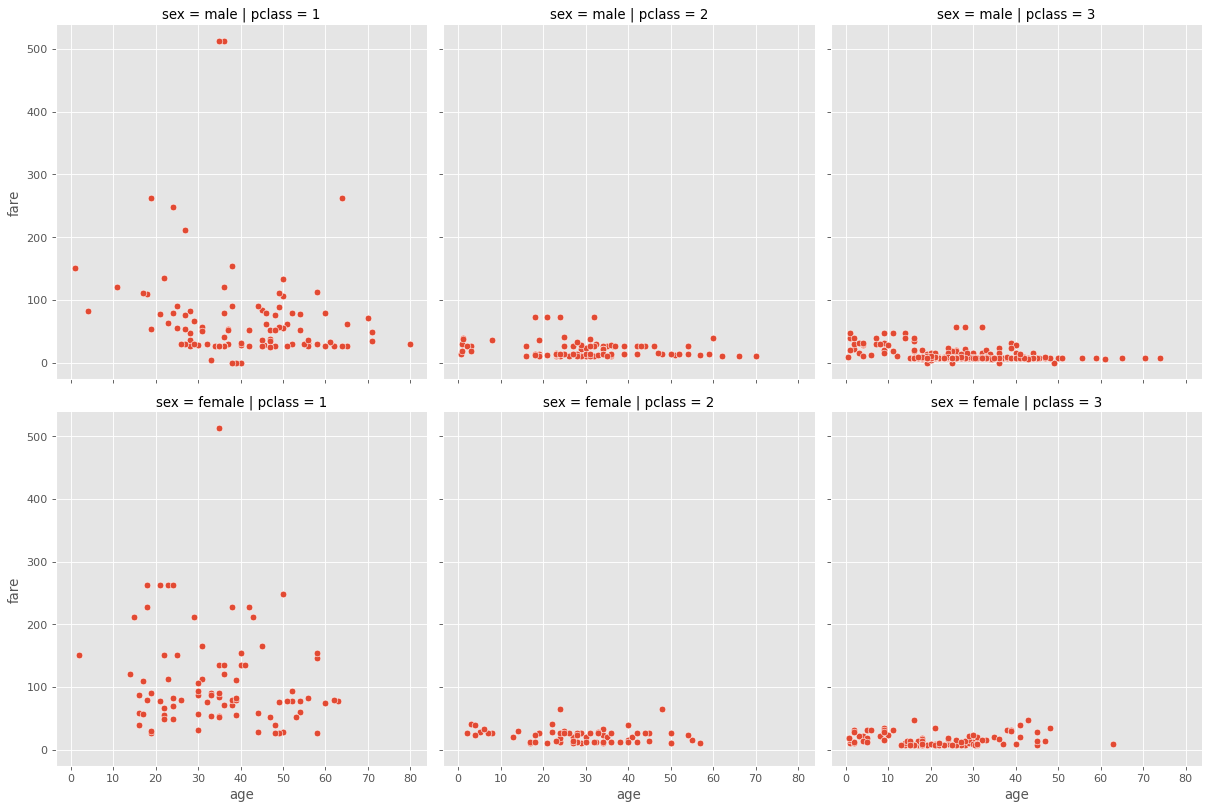

In [157]:
sns.relplot(x='age',y='fare',data=titanic,col='pclass',row='sex')

### SibSp

In [158]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

<AxesSubplot:xlabel='sibsp', ylabel='count'>

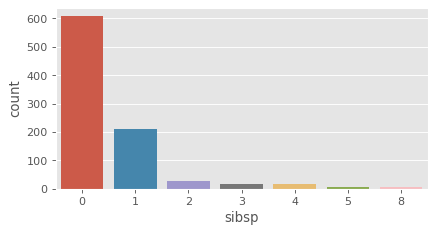

In [159]:
sns.countplot(x='sibsp',data=titanic)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

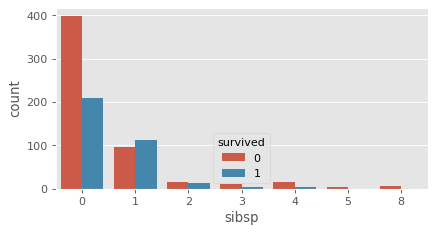

In [162]:
sns.countplot(x='sibsp',data=titanic,hue='survived')

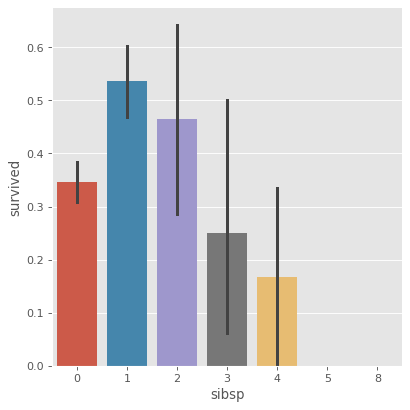

In [163]:
sns.catplot(x='sibsp',y='survived',kind='bar',data=titanic)

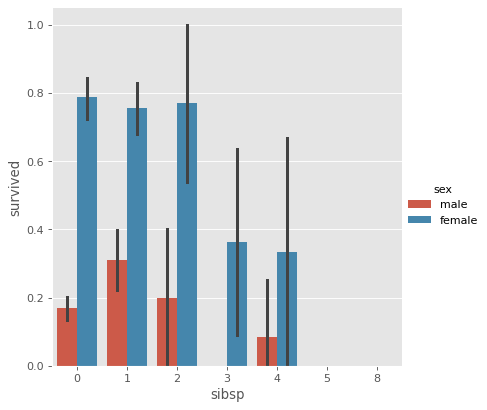

In [164]:
sns.catplot(x='sibsp',y='survived',kind='bar',data=titanic,hue='sex')

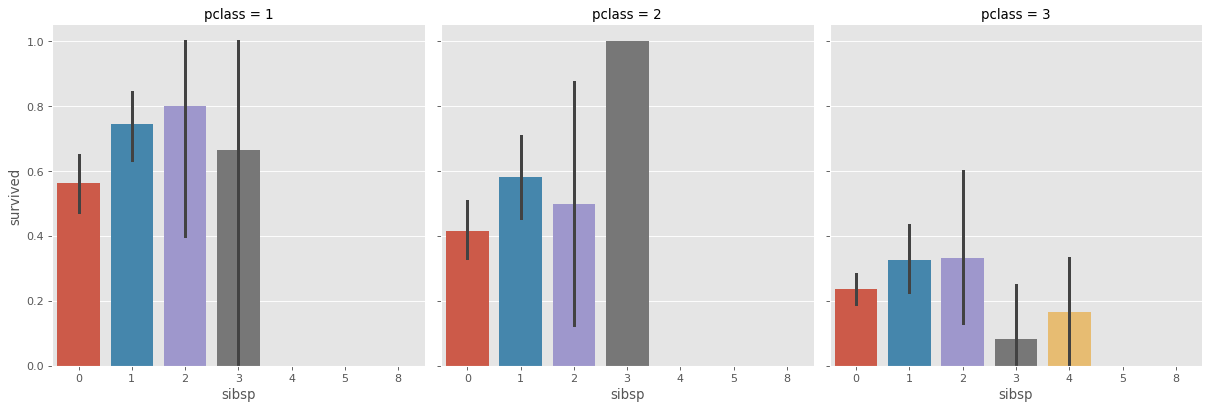

In [167]:
sns.catplot(x='sibsp',y='survived',kind='bar',data=titanic,col='pclass')

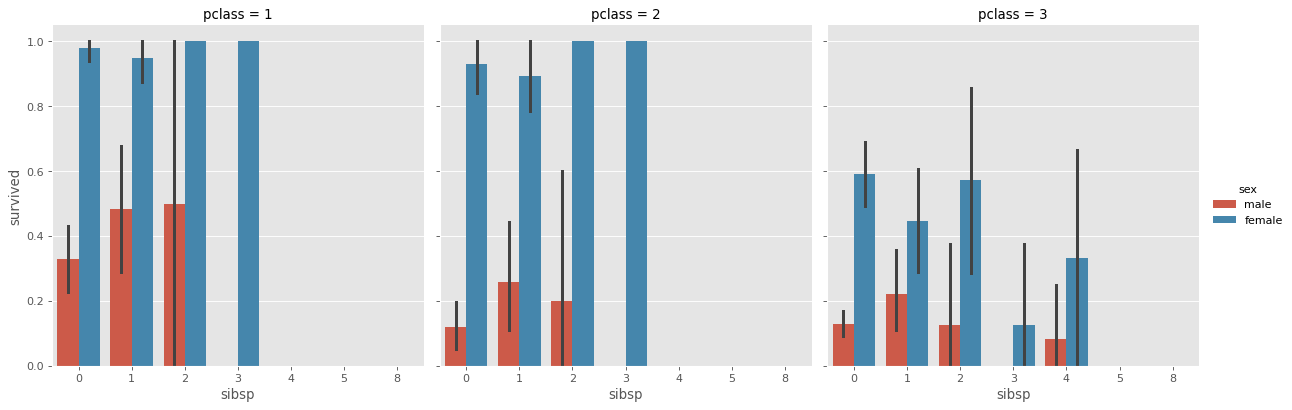

In [168]:
sns.catplot(x='sibsp',y='survived',kind='bar',data=titanic,col='pclass',hue='sex')

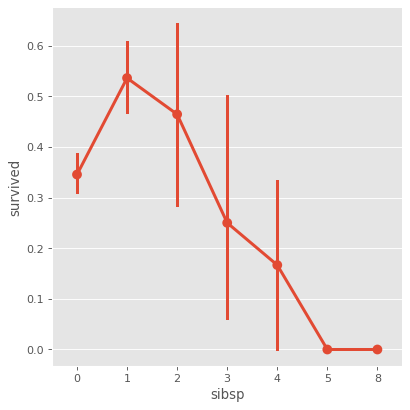

In [170]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic)

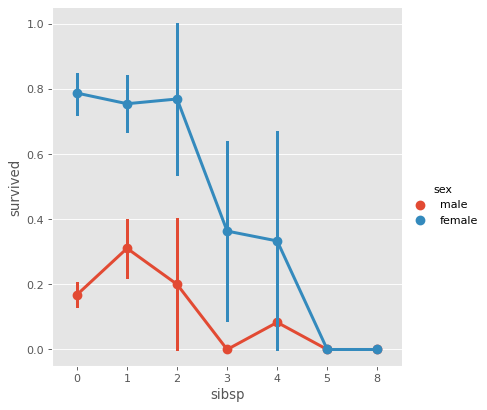

In [171]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic, hue='sex')

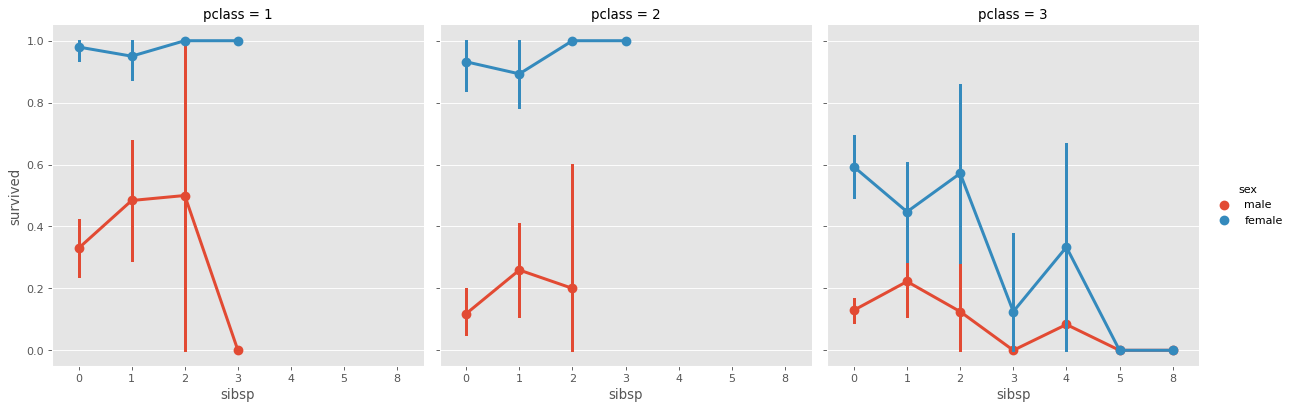

In [174]:
sns.catplot(x='sibsp', y='survived', kind='point', data=titanic, col='pclass',hue='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of t

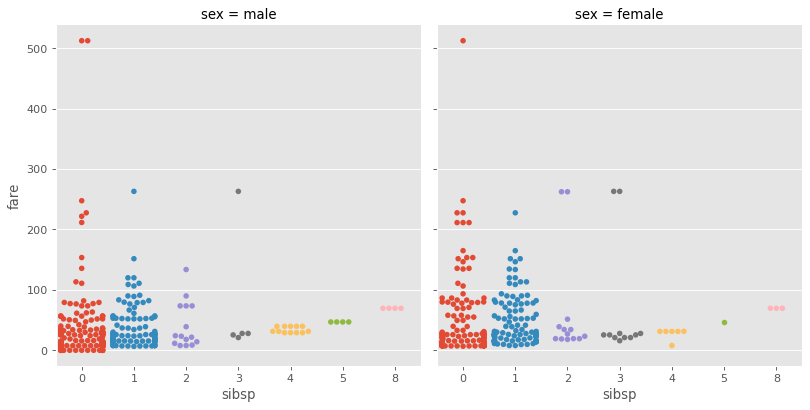

In [176]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', col='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of 

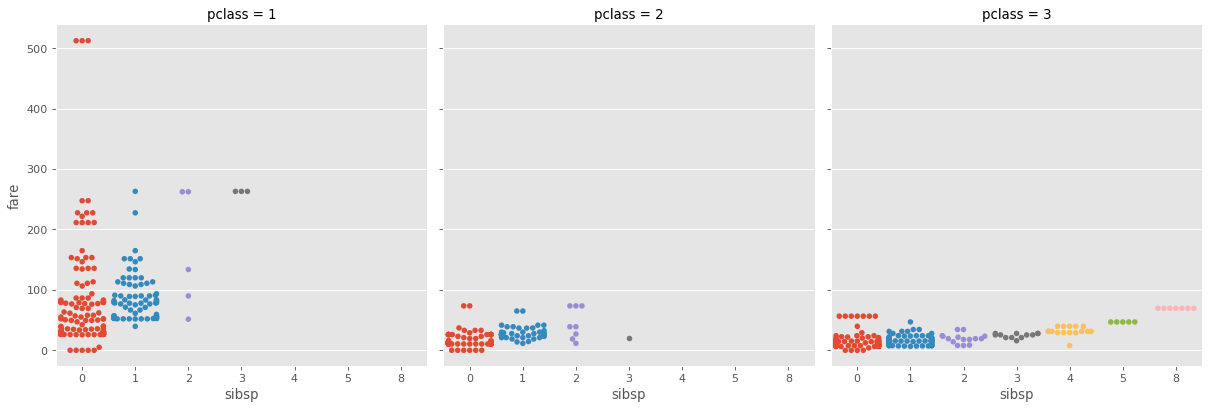

In [177]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', col='pclass')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of 

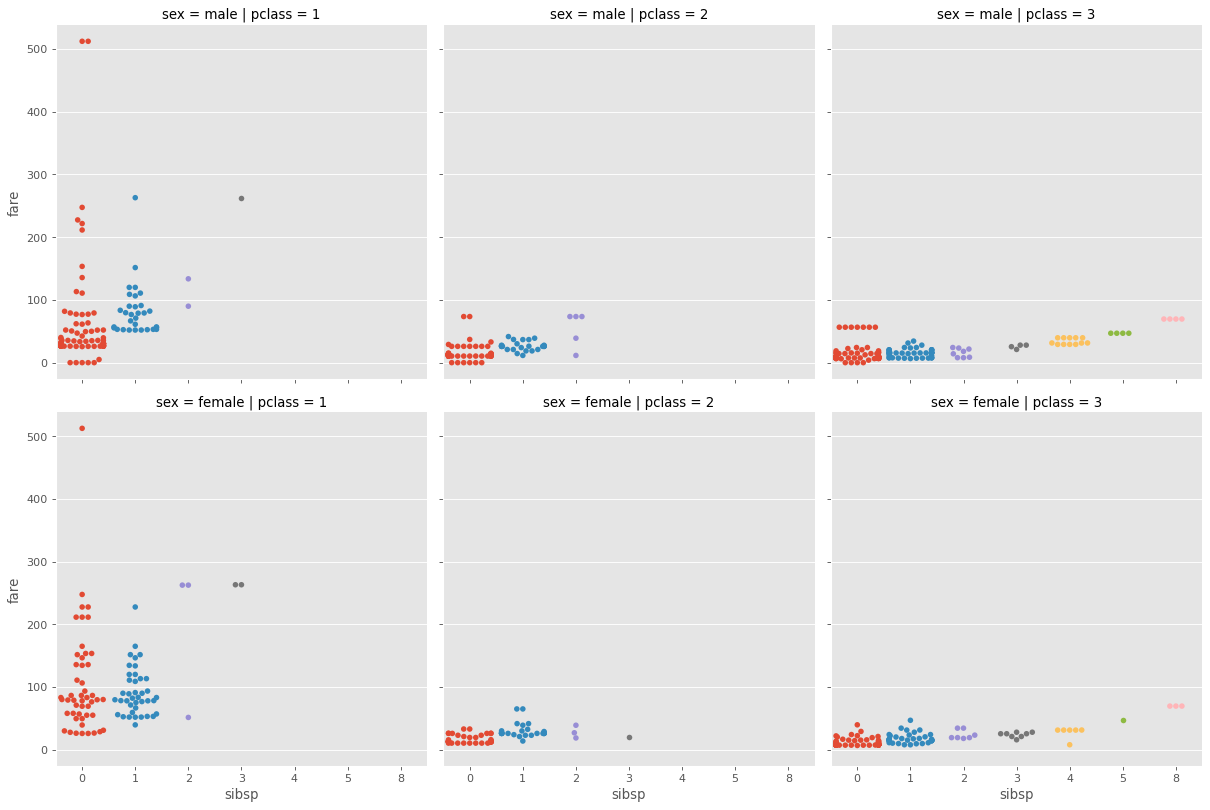

In [178]:
sns.catplot(x='sibsp', y='fare', data=titanic, kind='swarm', col='pclass', row='sex')

### ParCh

In [179]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='parch', ylabel='count'>

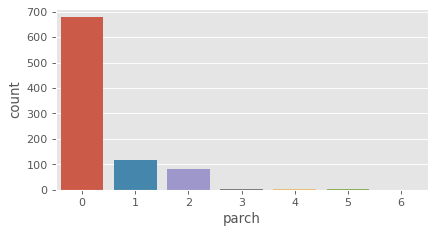

In [180]:
sns.countplot(x='parch', data=titanic)

<AxesSubplot:xlabel='parch', ylabel='count'>

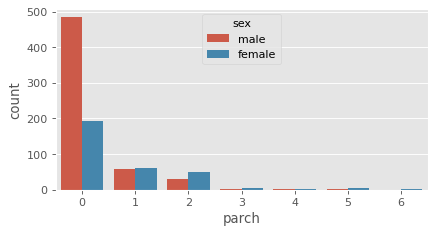

In [181]:
sns.countplot(x='parch', data=titanic, hue='sex')

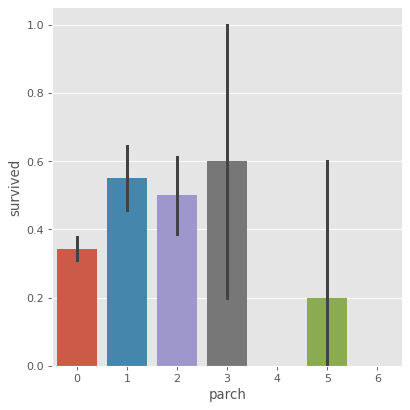

In [183]:
sns.catplot(x='parch',y='survived',data=titanic,kind='bar')

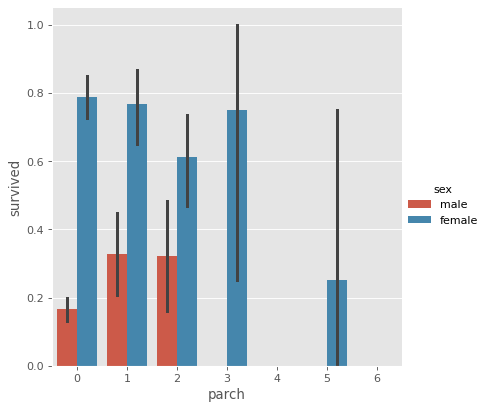

In [184]:
sns.catplot(x='parch',y='survived',data=titanic,kind='bar',hue='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


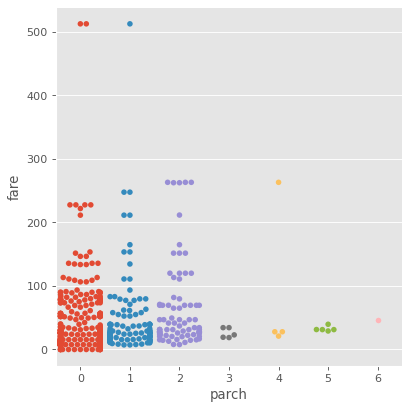

In [185]:
sns.catplot(x='parch',y='fare',data=titanic,kind='swarm')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.7% of t

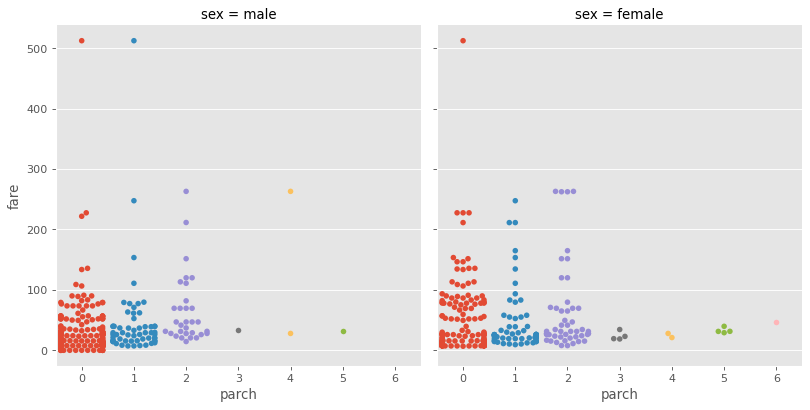

In [186]:
sns.catplot(x='parch',y='fare',data=titanic,kind='swarm',col='sex')

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.1% of t

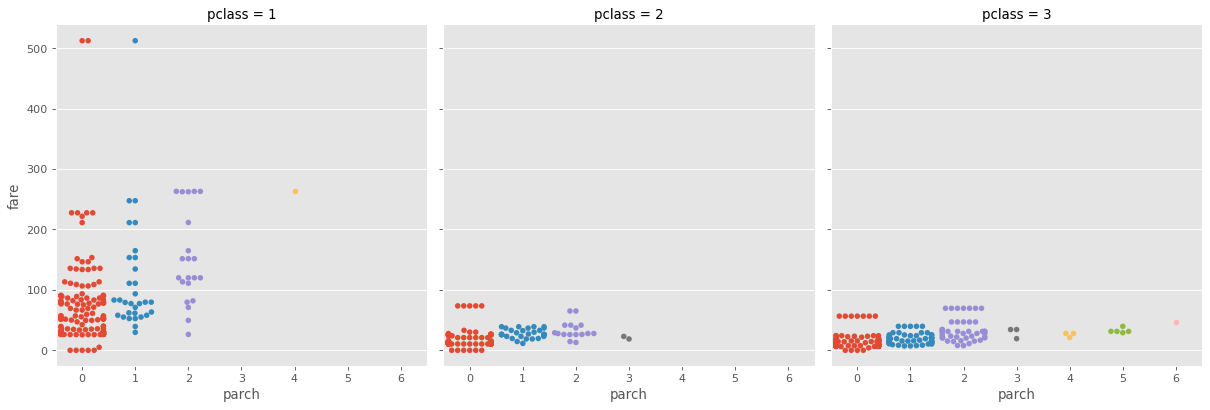

In [187]:
sns.catplot(x='parch',y='fare',data=titanic,kind='swarm',col='pclass')
plt.show()

C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Minango\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of 

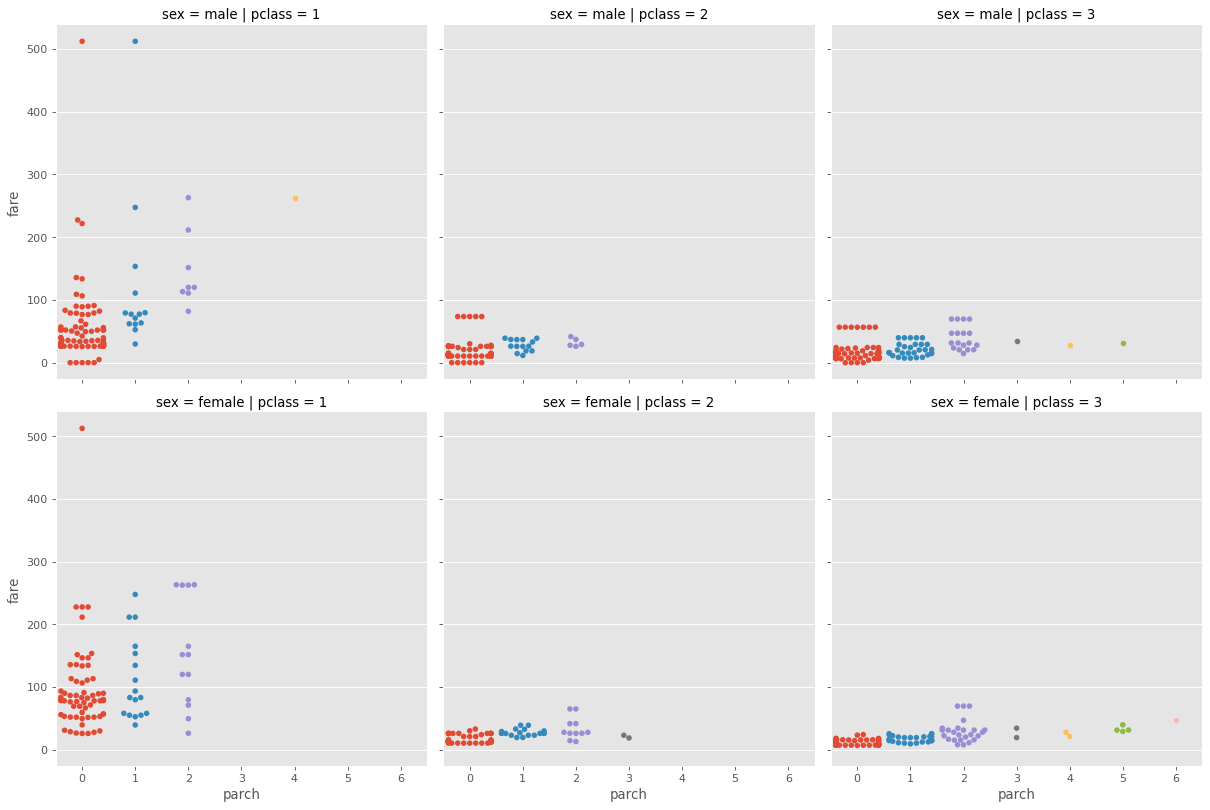

In [188]:
sns.catplot(x='parch',y='fare',data=titanic,kind='swarm',col='pclass',row='sex')

### Embarked

In [189]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:xlabel='embarked', ylabel='count'>

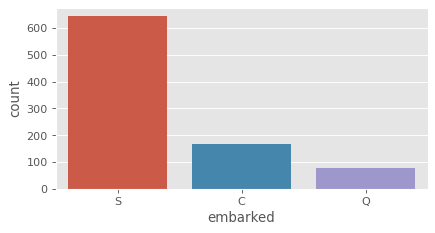

In [191]:
sns.countplot(x='embarked', data=titanic)

<AxesSubplot:xlabel='embarked', ylabel='count'>

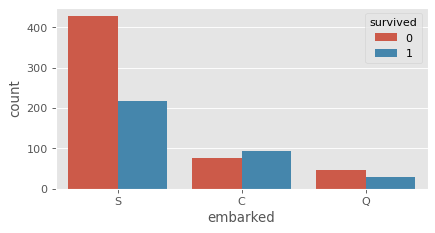

In [193]:
sns.countplot(x='embarked', data=titanic, hue='survived')

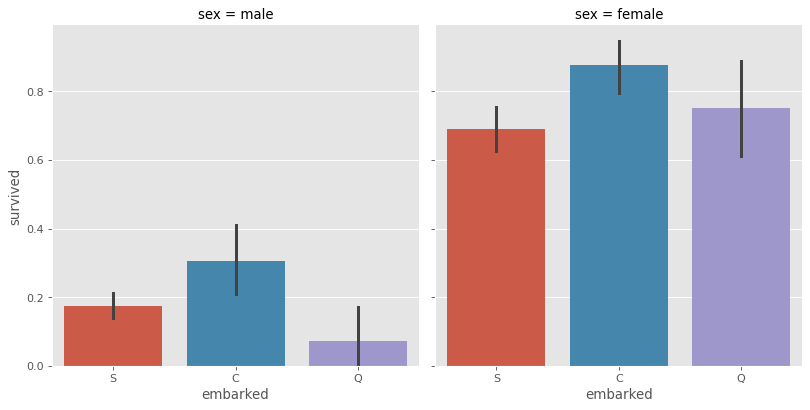

In [198]:
sns.catplot(x='embarked', y='survived', data=titanic, kind='bar', col='sex')

### Who

In [199]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [200]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

<AxesSubplot:xlabel='who', ylabel='count'>

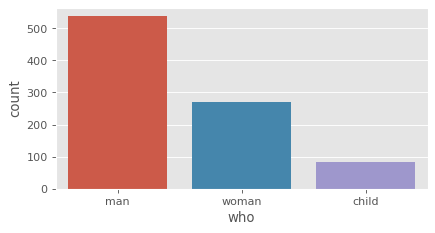

In [201]:
sns.countplot(x='who', data=titanic)

<AxesSubplot:xlabel='who', ylabel='count'>

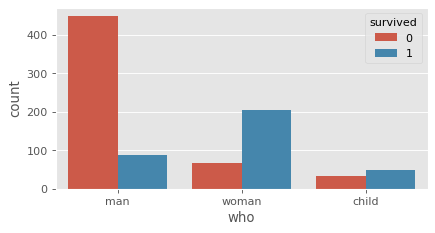

In [202]:
sns.countplot(x='who', data=titanic, hue='survived')

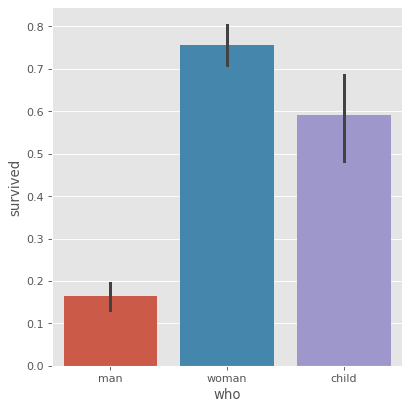

In [203]:
sns.catplot(x='who', y='survived', data=titanic, kind='bar')

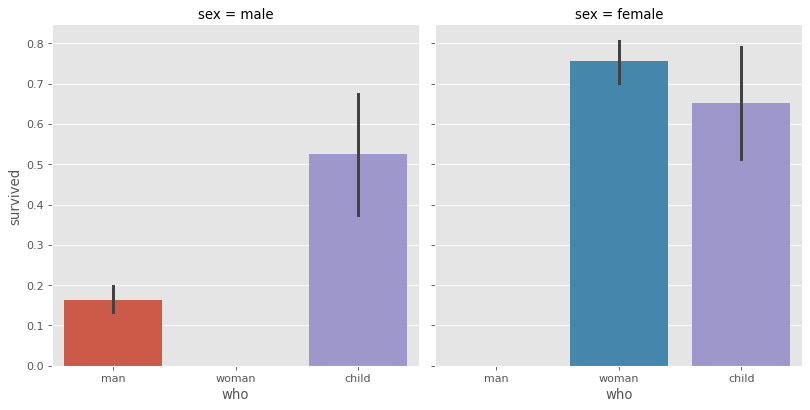

In [204]:
sns.catplot(x='who', y='survived', data=titanic, kind='bar',col='sex')

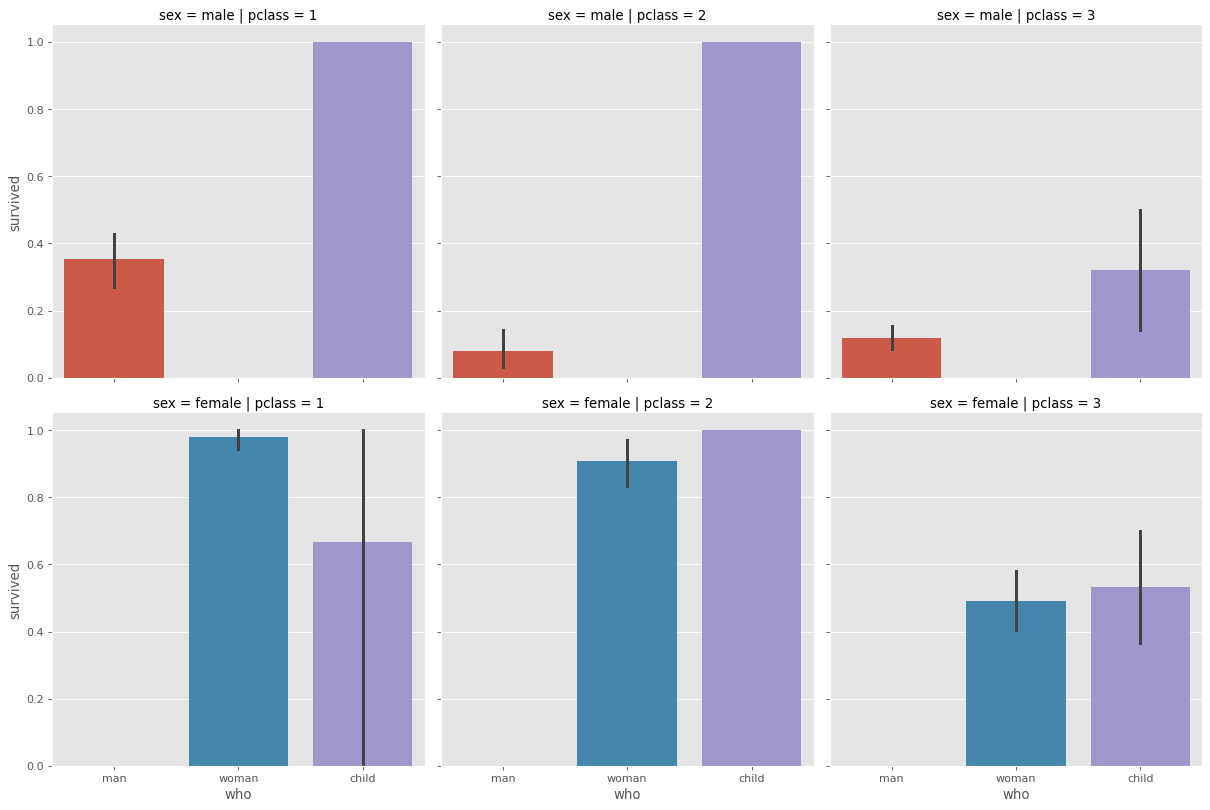

In [208]:
sns.catplot(x='who', y='survived', data=titanic, kind='bar',row='sex',col='pclass')

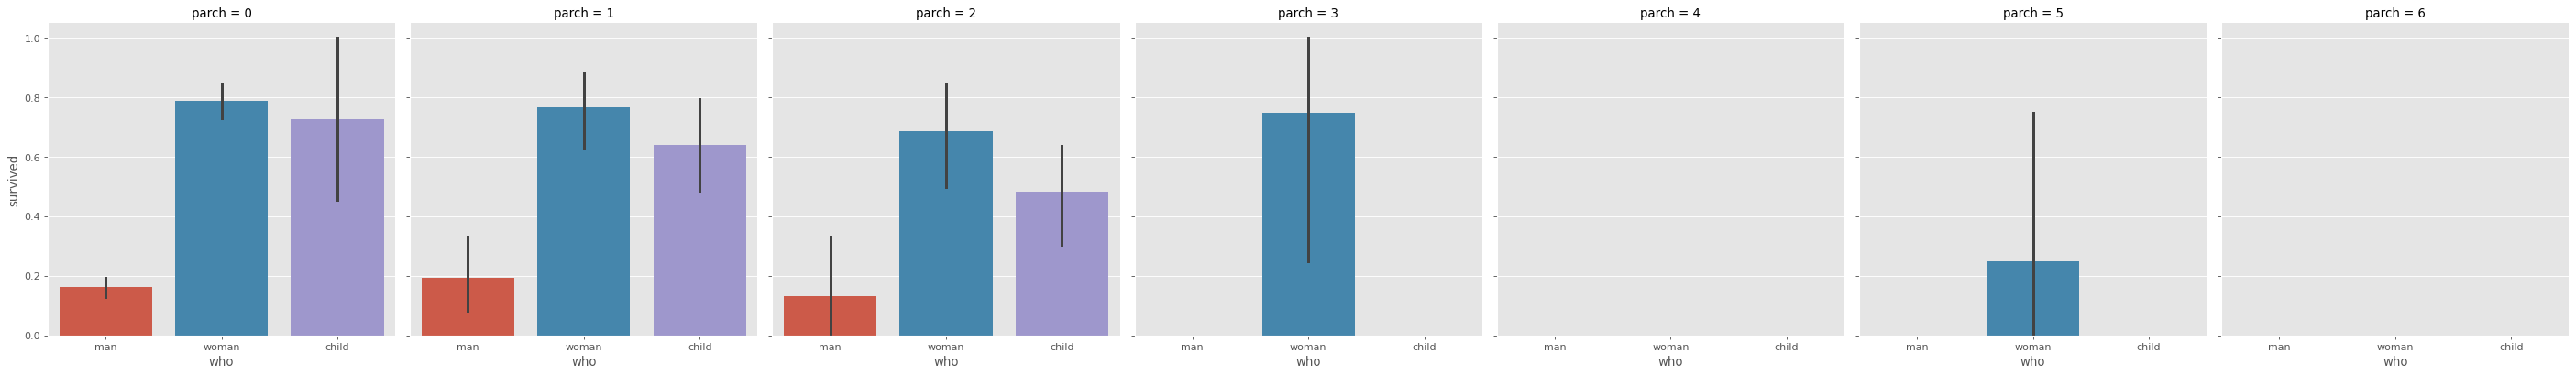

In [209]:
sns.catplot(x='who', y='survived', data=titanic, kind='bar',col='parch')

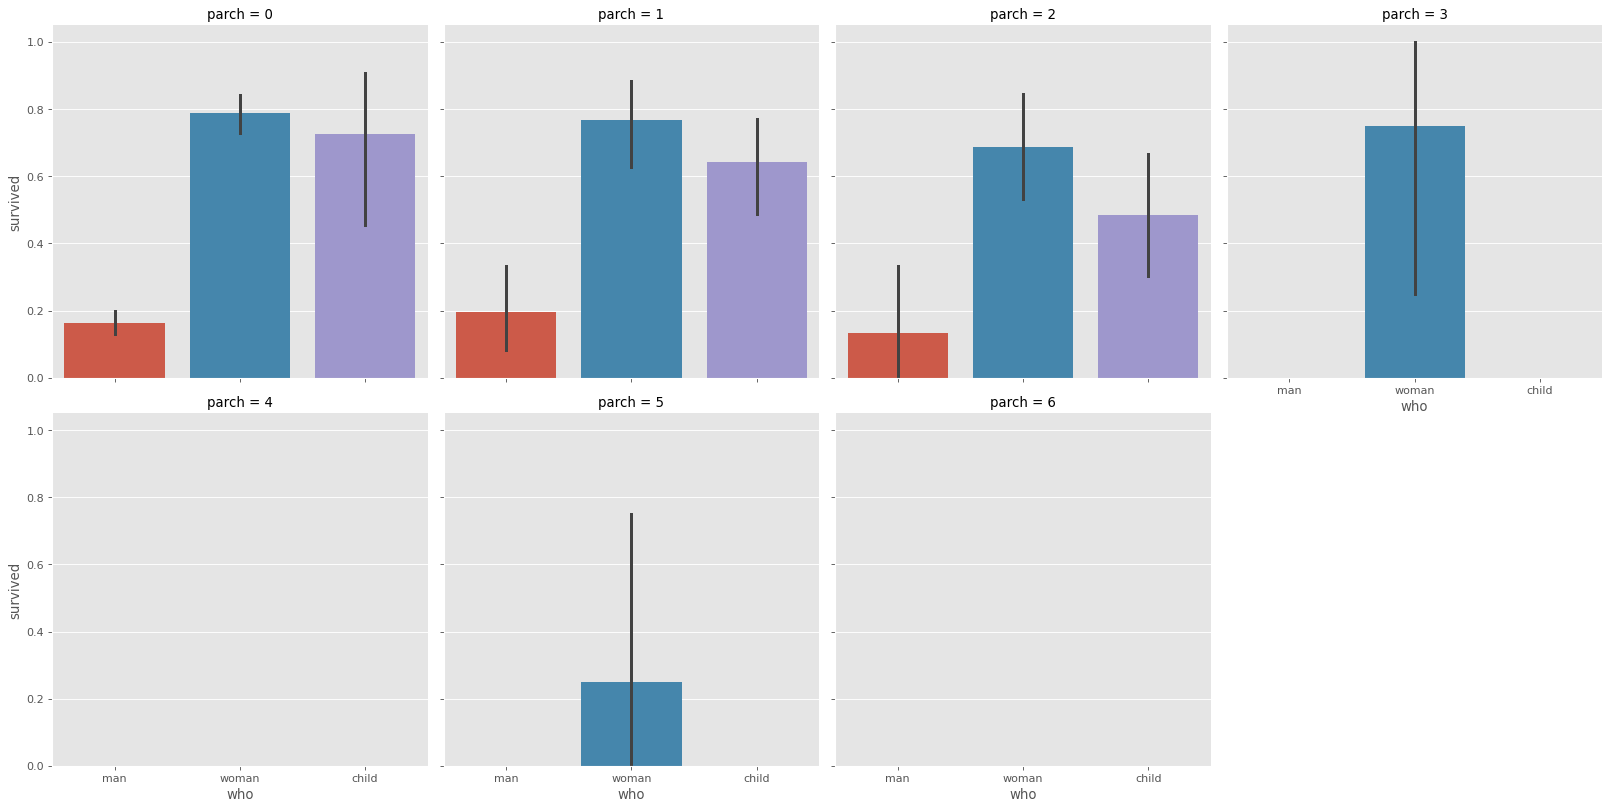

In [210]:
sns.catplot(x='who', y='survived', data=titanic, kind='bar',col='parch',col_wrap=4)